#This dataset is about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

In [2]:
#Importing all the libraries 
import pandas as pd
import numpy as np
from numpy import random as rd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import re



In [1]:
#Installing pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 61.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=64585ba74dcbdd6199f18048d8bc28af14d775c18a6ffc35ac7fc6127b75f77c
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


# Creating Environment for pyspark

In [3]:
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
conf=SparkConf().setAppName('test')
sc=SparkContext(conf=conf)
spark=SparkSession.builder.appName('test').getOrCreate()
sqlcontext=SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
#First I am trying to clean the data using the pandas library available in pythhon .The steps followed below are for the same purpose.

In [4]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head().T # df.head() is used to display the first 5 rows of your dataset.You can also choose to display as many rows as you want by passing values inside 
#the parenthesis. For eg: df.head(15) will display the first 15 rows of your dataset

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [5]:
df.shape #df.shape gives the number of rows and columns in your dataset. This dataset has 7043 rows and 33 columns

(7043, 33)

In [6]:
cols = df.columns #df.columns is used to display the all the columns in your dataset.Here I have printed the names of the columns in a list format by using
#print(list(cols))
print(list(cols))

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [7]:
df = df.astype({'Count':'int64','Zip Code':'object','Latitude':'object','Longitude':'object','Churn Value':'int64','Churn Score':'int64','CLTV':'int64','Tenure Months':'int64'})
#df.astype is used to change the datatypes of the columns in your dataset

In [11]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"],errors='coerce')
#pd.to_numeric is used to convert object datatype to float datatype.Here Total Charges had object datatype so I have converted it to float64.

In [12]:
df.isnull().sum() #df.isnull().sum() tells us how many null values are there per column.Here it shows that there are 5174 null values in Churn Reason column

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [13]:

df.drop('Churn Reason',axis=1,inplace=True)#df.drop is used to drop the columns from your dataset.axis=1 specifies that we are dropping a column.
#inplace=True will drop the column permanently.Here I have dropped the churn reason column because there are more than 50% null values in this column.

In [14]:
df.drop('Lat Long',axis=1,inplace=True)#I am also dropping the 'Lat Long' column because we have seperate columns for Latitude and Longitude as 'Latitude'
# and 'Longitude' respectively.

In [15]:
df.info() #df.info() gives column names,datatypes of columns,non-null count per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   object 
 6   Latitude           7043 non-null   object 
 7   Longitude          7043 non-null   object 
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

#Outlier Analysis

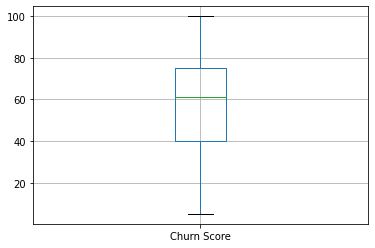

In [16]:
df.boxplot('Churn Score') #To check if there are outliers in a particular column, we can plot a boxplot for that column.If there are some points above or
#below the lower whisker it means that there are outliers in that column and we need to eliminate them (if the percentage of outliers is more than 0.3%)
# using appropriate steps.Similarly you can see the boxplots of the remaining numerical columns of the dataset below and as seen there are no outliers in
#any of the numerical columns


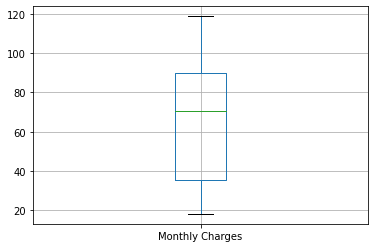

In [ ]:
df.boxplot('Monthly Charges')

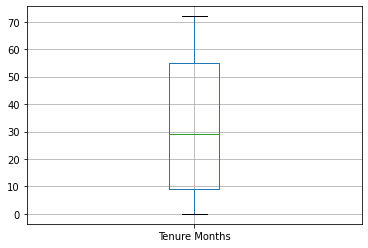

In [ ]:
df.boxplot('Tenure Months')

1.Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.


In [17]:


#Statistical Explanation of data types:
#CustomerID : Categorical(Nominal)
#Count : Numerical(discrete)
#Country:Categorical(Nominal)
#State: Categorical(Nominal)
#City: Categorical(Nominal)
#Zip Code: Categorical(Nominal)
#Lat Long : Categorical(Nominal)
#Latitude:Categorical(Nominal)
#Longitude:Categorical(Nominal)
#Gender:Categorical(Nominal)
#Senior Citizen: Categorical(Nominal)
#Partner: Categorical(Nominal)
#Dependents: Categorical(Nominal)
#Tenure Months:Numerical(discrete)
#Phone Service :Categorical(Nominal)  
#Multiple Lines : Categorical(Nominal)       
#Internet Service : Categorical(Ordinal)    
#Online Security : Categorical(Nominal)     
#Online Backup : Categorical(Nominal)        
#Device Protection : Categorical(Nominal)  
#Tech Support : Categorical(Nominal)      
#Streaming TV : Categorical(Nominal)     
#Streaming Movies : Categorical(Nominal)
#Contract : Categorical(Nominal)            
#Paperless Billing : Categorical(Nominal)       
#Payment Method : Categorical(Nominal)         
#Monthly Charges : Numerical(Continuous)      
#Total Charges : Numerical(Continuous)        
#Churn Label : Categorical(Nominal)           
#Churn Value : Categorical(Nominal)        
#Churn Score : Numerical(Discrete)       
#CLTV : Numerical(Continuous)             
#Churn Reason : Categorical(Nominal)

df.info() #df.info() gives column names,datatypes of columns,non-null count per column



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   object 
 6   Latitude           7043 non-null   object 
 7   Longitude          7043 non-null   object 
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

Q2.Please apply appropriate statistical measures using python based on data types.

In [18]:
df['CustomerID'].mode() #I have used mode as a statistical measure here because customerID is categorical column and applying mean and median on categorical 
#columns would not fetch us the appropriate results


0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7038    9987-LUTYD
7039    9992-RRAMN
7040    9992-UJOEL
7041    9993-LHIEB
7042    9995-HOTOH
Length: 7043, dtype: object

In [19]:
#For numerical columns we can calculate all the measures of central tendency(mean,median,mode) and measures of dispersion(Variance,Standard deviation,IQR)
# except mode.IQR= equals to Interquartile range

#measures of central tendency
print(df['Count'].mean())
print(df['Count'].median())

#measures of dispersion
print(df['Count'].std())
print(df['Count'].var())
print(df['Count'].describe())

q3=1
q1=1
IQR= q3-q1
IQR



1.0
1.0
0.0
0.0
count    7043.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Count, dtype: float64


0

In [ ]:
print(df['Country'].mode()) #used mode here because customerID is categorical column
print(df['State'].mode()) #used mode here because State is categorical column
print(df['City'].mode()) #used mode here because City is categorical column
print(df['Zip Code'].mode()) #used mode here because Zip Code is categorical column
print(df['Lat Long'].mode()) #used mode here because Lat Long is categorical column
print(df['Latitude'].mode()) #used mode here because Latitude is categorical column
print(df['Longitude'].mode()) #used mode here because Longitude is categorical column
print(df['Senior Citizen'].mode()) #used mode here because Senior Citizen is categorical column
print(df['Partner'].mode()) #used mode here because Partner is categorical column
print(df['Dependents'].mode()) #used mode here because Dependents is categorical column


0    United States
dtype: object
0    California
dtype: object
0    Los Angeles
dtype: object
0      90001.0
1      90002.0
2      90003.0
3      90004.0
4      90005.0
        ...   
430    92301.0
431    92304.0
432    92305.0
433    92307.0
434    92308.0
Length: 435, dtype: object
0      32.555828, -117.040073
1      32.578103, -117.012975
2      32.579134, -117.119009
3      32.587557, -116.636816
4       32.605012, -116.97595
                ...          
430     34.502432, -118.41459
431    34.506627, -118.699048
432     34.55082, -117.122396
433    34.559882, -115.637164
434    34.667815, -117.536183
Length: 435, dtype: object
0      32.555828
1      32.578103
2      32.579134
3      32.587557
4      32.605012
         ...    
430    34.502432
431    34.506627
432     34.55082
433    34.559882
434    34.667815
Length: 435, dtype: object
0   -121.994813
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object


In [ ]:
#For numerical columns we can calculate all the measures of central tendency(mean,median,mode) and measures of dispersion(Variance,Standard deviation,IQR)
# except mode.IQR equals to Interquartile range

#measures of central tendency
print(round(df['Tenure Months'].mean(),2))
print(round(df['Tenure Months'].median(),2))
#measures of dispersion
print(round(df['Tenure Months'].std(),2))
print(round(df['Tenure Months'].var(),2))
print(df['Tenure Months'].describe())

q3=55
q1=9
IQR= q3-q1
IQR



32.37
29.0
24.56
603.17
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64


46

In [ ]:
#I have used mode for all the columns below because they are categorical columns

print(df['Phone Service'].mode())
print(df['Multiple Lines'].mode())
print(df['Internet Service'].mode())
print(df['Online Security'].mode())
print(df['Online Backup'].mode())
print(df['Device Protection'].mode())
print(df['Tech Support'].mode())
print(df['Streaming TV'].mode())
print(df['Streaming Movies'].mode())
print(df['Contract'].mode())
print(df['Paperless Billing'].mode())
print(df['Payment Method'].mode())



0    Yes
dtype: object
0    No
dtype: object
0    Fiber optic
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    Month-to-month
dtype: object
0    Yes
dtype: object
0    Electronic check
dtype: object


In [ ]:
#For numerical columns we can calculate all the measures of central tendency(mean,median,mode) and measures of dispersion(Variance,Standard deviation,IQR)
# except mode.IQR=Interquartile range

#measures of central tendency
print(round(df['Monthly Charges'].mean(),2))
print(round(df['Monthly Charges'].median(),2))
#measures of dispersion
print(round(df['Monthly Charges'].std(),2))
print(round(df['Monthly Charges'].var(),2))
print(df['Monthly Charges'].describe())

q3=89.85
q1=35.50
IQR= q3-q1
print(round(IQR,2))





64.76
70.35
30.09
905.41
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64
54.35


In [ ]:
#I have used mode for all the columns below because they are categorical columns

print(df['Churn Label'].mode())
print(df['Churn Value'].mode())
print(df['Churn Reason'].mode())

0    No
dtype: object
0    0
dtype: object
0    Attitude of support person
dtype: object


In [ ]:
#For numerical columns we can calculate all the measures of central tendency(mean,median,mode) and measures of dispersion(Variance,Standard deviation,IQR)
# except mode.IQR=Interquartile range

#measures of central tendency
print(round(df['Churn Score'].mean(),2))
print(round(df['Churn Score'].median(),2))
#measures of dispersion
print(round(df['Churn Score'].std(),2))
print(round(df['Churn Score'].var(),2))
print(df['Churn Score'].describe())

q3=75
q1=40
IQR= q3-q1
print(round(IQR,2))



58.7
61.0
21.53
463.33
count    7043.000000
mean       58.699418
std        21.525131
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64
35


In [ ]:
#For numerical columns we can calculate all the measures of central tendency(mean,median,mode) and measures of dispersion(Variance,Standard deviation,IQR)
# except mode.IQR=Interquartile range

#measures of central tendency
print(round(df['CLTV'].mean(),2))
print(round(df['CLTV'].median(),2))
#measures of dispersion
print(round(df['CLTV'].std(),2))
print(round(df['CLTV'].var(),2))
print(df['CLTV'].describe())


q3=5380.50
q1=3469.00
IQR= q3-q1
print(round(IQR,2))



4400.3
4527.0
1183.06
1399624.22
count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64
1911.5


Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

In [20]:


#To calculate the percentage of females in this dataset I have first calculated the count of Males and Females by using the 'value_counts()' function.
#This function gives us the count of different values in a particular column.Here I have used the Gender column to know the count of Males and Females.
#Then I moved to the visualization part:
#plt.figure(figsize=(w,h)) : It is used to set the width and height of your plot
#plt.title('title') : It is used to give a title to your plot
#In the values variable I have assigned the count of Males and Females respectively
#In the next step I have given labels to those values as Male and Female
#In the next step I have set the colors for those values.
#explode is used to divide the pie chart into pieces
#Then I have used the plt.pie function and fed all the variables in there 
#Then Finally I have used the plt.show() function to reveal the plot.
#shadow=True adds shadow to your pie chart
#autopct converts the values into percentages.


#The same steps are being followed to calculate the percentage of senior citizens


df.value_counts('Gender')

Gender
Male      3555
Female    3488
dtype: int64

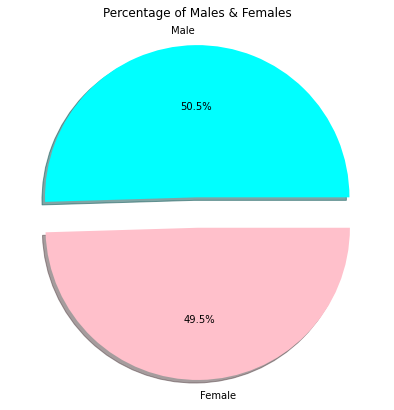

In [21]:
plt.figure(figsize=(7,7))
plt.title('Percentage of Males & Females')
values=[3555,3488]
labels=['Male','Female']
colors=('Cyan','Pink')
explode=(0.1,0.1)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

In [22]:
df.value_counts('Senior Citizen')

Senior Citizen
No     5901
Yes    1142
dtype: int64

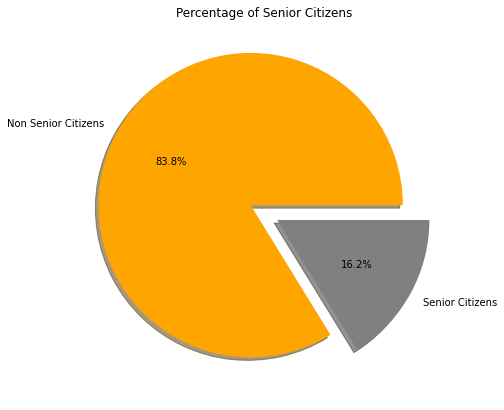

In [23]:
plt.figure(figsize=(7,7))
plt.title('Percentage of Senior Citizens')
values=[5901,1142]
labels=['Non Senior Citizens','Senior Citizens']
colors=('Orange','Grey')
explode=(0.1,0.1)
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

Q4:Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, 
perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.


<Figure size 720x504 with 0 Axes>

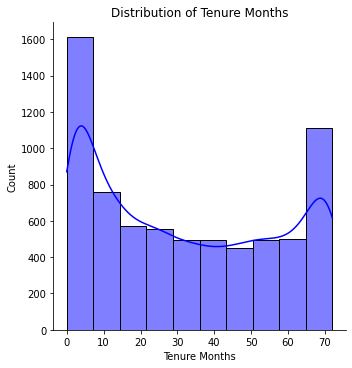

In [ ]:
#Q4:Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, 
#perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

#Here to calculate the distribution of tenure months column I have used a displot
sns.displot(x='Tenure Months',data=df,color='b',bins=10,kde=True)
plt.title('Distribution of Tenure Months')
plt.show()

In [ ]:
#Now as seen above the plot is fairly symmetrical so the robust measure of central tendency is 'mean' and the robust measure of dispersion is 'Standard Deviation'
#So I have calculated both:


print(df['Tenure Months'].describe())
#The describe() function gives us the count,mean,standard deviation,min value,max value,25th,50th,75th percentile of a column as seen below




count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64


In [24]:
#The data is fairly symmetrical as the skewness value is between 0 and 0.5
#Skewness value:
round(df['Tenure Months'].skew(),2) #here I have used the round function to round off the skewness value

0.24

Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [28]:


#For this question I have used the get_dummies function to convert all Binary columns into 0 and 1 which creates two separate columns for the binary values 
#of a particular column so I have dropped one of the columns and renamed the other to get the desired output

df_1=pd.get_dummies(df[['Gender','Partner','Senior Citizen','Dependents','Phone Service','Paperless Billing','Churn Label']]) 

droppingcols=['Gender_Female','Partner_No','Senior Citizen_No','Dependents_No','Phone Service_No','Paperless Billing_No','Churn Label_No']
df_1=df_1.drop(droppingcols,axis=1)

df_1=df_1.rename(columns={'Gender_Male':'Gender','Partner_Yes':'Partner','Senior Citizen_Yes':'Senior Citizen','Dependents_Yes':'Dependents',
                          'Phone Service_Yes':'Phone Service','Paperless Billing_Yes':'Paperless Billing','Churn Label_Yes':'Churn Label'})

df_1





,Gender,Partner,Senior Citizen,Dependents,Phone Service,Paperless Billing,Churn Label
0,1,0,0,0,1,1,1
1,0,0,0,1,1,1,1
2,0,0,0,1,1,1,1
3,0,1,0,1,1,1,1
4,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...
7038,0,0,0,0,1,1,0
7039,1,1,0,1,1,1,0
7040,0,1,0,1,1,1,0
7041,0,1,0,1,0,1,0


Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 


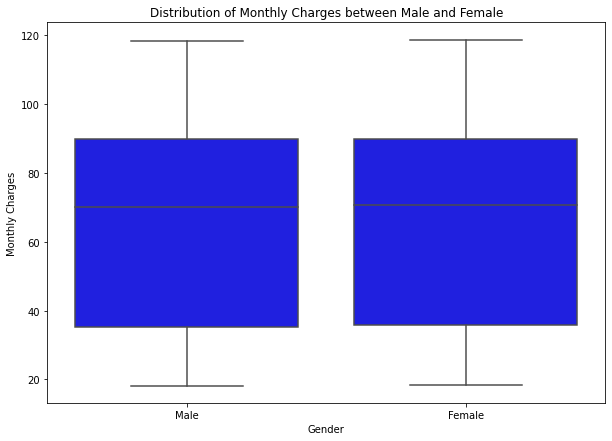

In [30]:

#For this purpose I have used the boxplot to show the distribution of monthly charges between males and females
plt.figure(figsize=(10,7)) #plt.figure is used toset the width & height of the plot
sns.boxplot(x='Gender',y='Monthly Charges',data=df,color='b')#Here you can pass the column names.'data' is used to specify your dataframe.'color' is used 
#to specify the colour
plt.title('Distribution of Monthly Charges between Male and Female')#Used to give Title to your plot
plt.show()

In [31]:
#The above plot shows us that the Distribution of Monthly Charges between Male and Female is almost equal i.e. Rs.35 to Rs.90

Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [37]:
Los_Angeles=df.query("City=='Los Angeles'") #First I have filtered the data where the City is Los Angeles using df.query
Los_Angeles.groupby('City')['Total Charges'].min()#Then I have used the groupby function to display Min Total Charges for Los Angeles City
#Minimum Total charges for Los Angeles City is 18.55 as seen below


City
Los Angeles    18.8
Name: Total Charges, dtype: float64

In [36]:
df.groupby('Zip Code')['Total Charges'].max()#Here I have used the groupby function to display Max Total Charges per Zip Code

Zip Code
90001    7634.25
90002    3653.00
90003    5597.65
90004    3870.30
90005    4921.20
          ...   
96145    8035.95
96146    4859.10
96148    7432.05
96150    4026.40
96161     305.55
Name: Total Charges, Length: 1652, dtype: float64

Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

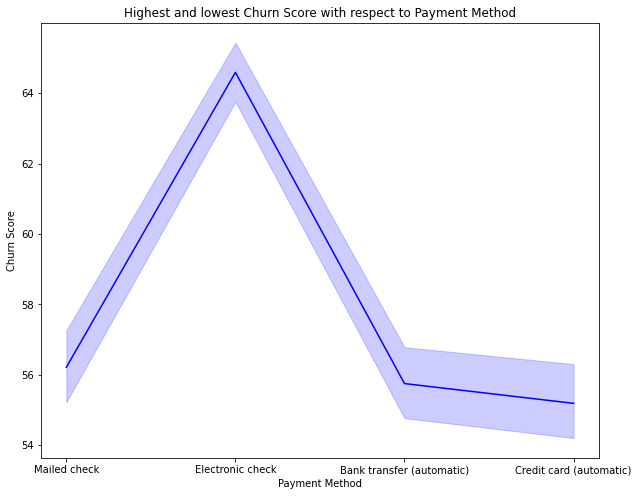

In [38]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Payment Method',y='Churn Score',data=df,color='b')
plt.title('Highest and lowest Churn Score with respect to Payment Method')
plt.show()

In [ ]:
#From the above plot it is clear that Electronic check has the highest churn score and Credit Card(automatic) has the lowest churn score

Q9: Please create an appropriate plot to check the count of payment methods and explain it.

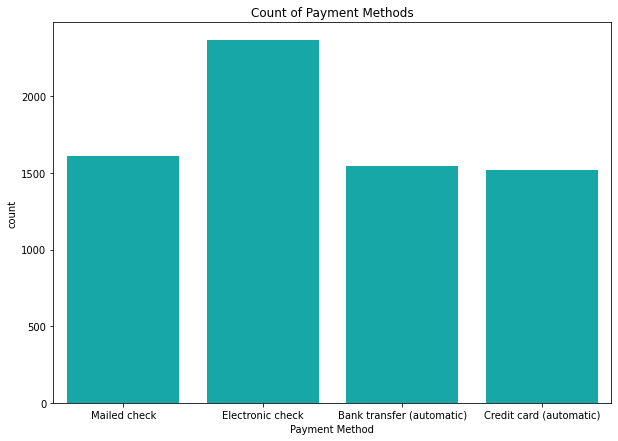

In [39]:

plt.figure(figsize=(10,7))
plt.title('Count of Payment Methods')
sns.countplot(x='Payment Method',data=df,color='c')
plt.show()


In [ ]:
#The Electronic Check Payment Method has the highest count and the Credit Card Payment Method has the lowest whereas Mailed Check and Bank Transfer payment methods have more or less the same count

Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

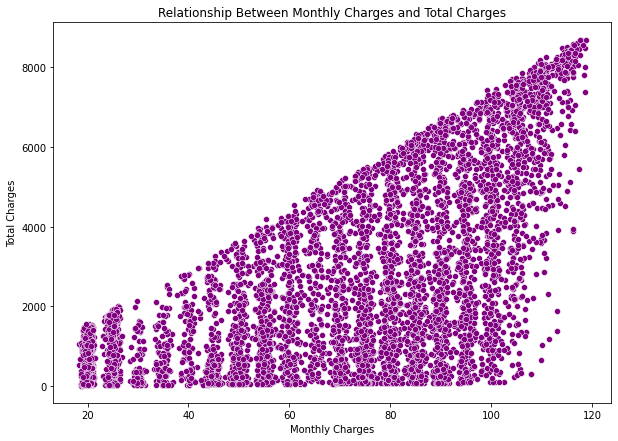

In [44]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Monthly Charges',y='Total Charges',data=df,color='purple')
plt.title('Relationship Between Monthly Charges and Total Charges')
plt.show()
#As seen in the plot below there is a linear relationship between Monthly Charges and Total Charges. As the Total Charges increases Monthly charges increases.

